# Salary Classification

- In this project, I used a dataset from kaggle [salaryPredictionDataset](https://www.kaggle.com/datasets/ayessa/salary-prediction-classification), which supplies data on whether participants made more or less than $50k. 
- The dataset contains a variety useful features, including education level, sex, race, occupation, and hours worked.
- After conducting analysis on these important data features, I used variety of Sklearn's classification tools to try and build the most effective model that I could. These classifiers include support vector machines, Gaussian Naive Bayes, K-Nearest Neighbors, Logistic Regression, Decision Tree, and Random Forest.

In [105]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

## Data Analysis

In [5]:
data = pd.read_csv('salary.csv')
data = data.drop(columns=['fnlwgt', 'relationship', 'capital-gain', 'capital-loss'])
print(data.head())

   age          workclass   education  education-num       marital-status  \
0   39          State-gov   Bachelors             13        Never-married   
1   50   Self-emp-not-inc   Bachelors             13   Married-civ-spouse   
2   38            Private     HS-grad              9             Divorced   
3   53            Private        11th              7   Married-civ-spouse   
4   28            Private   Bachelors             13   Married-civ-spouse   

           occupation    race      sex  hours-per-week  native-country  salary  
0        Adm-clerical   White     Male              40   United-States   <=50K  
1     Exec-managerial   White     Male              13   United-States   <=50K  
2   Handlers-cleaners   White     Male              40   United-States   <=50K  
3   Handlers-cleaners   Black     Male              40   United-States   <=50K  
4      Prof-specialty   Black   Female              40            Cuba   <=50K  


The first thing I did after examining the raw data, was create an encoded salary column, with 1 values for over $50k and 0 values for under.

In [ ]:
# create binary encoded income
data["salary_enc"] = data["salary"].astype('category')
data["salary_enc"] = data["salary_enc"].cat.codes
data["salary_enc"]

### Age

In [8]:
# get age data for salary brackets
greater50age = data.age[data.salary == ' >50K']
less50age = data.age[data.salary == ' <=50K']

In [110]:
# the quantiles show that the vast majority of participants 
# are middle-aged or younger
ageGroups = data.age.quantile([0,.25,.5,.75,1])
ageGroups

0.00    17.0
0.25    28.0
0.50    37.0
0.75    48.0
1.00    90.0
Name: age, dtype: float64

In [10]:
ageCounts = {'20-30':0, '30-40':0, '40-50':0, '50-60':0, '60+':0}
for value in data.age:
    if value >= 20 and value < 30:
        ageCounts['20-30'] += 1
    elif value >= 30 and value < 40:
        ageCounts['30-40'] += 1
    elif value >= 40 and value < 50:
        ageCounts['40-50'] += 1
    elif value >= 50 and value < 60:
        ageCounts['50-60'] += 1
    else:
        ageCounts['60+'] += 1
ageCounts

{'20-30': 8054, '30-40': 8613, '40-50': 7175, '50-60': 4418, '60+': 4301}

In [11]:
# get labels for age group plots
ageLabels = []
for value in ageCounts:
    ageLabels.append(value)
ageLabels

['20-30', '30-40', '40-50', '50-60', '60+']

Below, I create a list of counts of each income level for each age group for use in a bar chart

In [12]:
# get array of lengths of each age groups for <=50k income level
less50_2030count = len(data.loc[(data['age'] >= 20) & (data['age'] < 30) & (data.salary == ' <=50K'), ['age']])
less50_3040count = len(data.loc[(data['age'] >= 30) & (data['age'] < 40) & (data.salary == ' <=50K'), ['age']])
less50_4050count = len(data.loc[(data['age'] >= 40) & (data['age'] < 50) & (data.salary == ' <=50K'), ['age']])
less50_5060count = len(data.loc[(data['age'] >= 50) & (data['age'] < 60) & (data.salary == ' <=50K'), ['age']])
less50_60count = len(data.loc[(data['age'] >= 60) & (data.salary == ' <=50K'), ['age']])
less50AgeCounts = [less50_2030count, less50_3040count, less50_4050count, less50_5060count, less50_60count]

# get array of lengths of each age groups for >50k income level
great50_2030count = len(data.loc[(data['age'] >= 20) & (data['age'] < 30) & (data.salary == ' >50K'), ['age']])
great50_3040count = len(data.loc[(data['age'] >= 30) & (data['age'] < 40) & (data.salary == ' >50K'), ['age']])
great50_4050count = len(data.loc[(data['age'] >= 40) & (data['age'] < 50) & (data.salary == ' >50K'), ['age']])
great50_5060count = len(data.loc[(data['age'] >= 50) & (data['age'] < 60) & (data.salary == ' >50K'), ['age']])
great50_60count = len(data.loc[(data['age'] >= 60) & (data.salary == ' >50K'), ['age']])
greater50AgeCounts = [great50_2030count, great50_3040count, great50_4050count, great50_5060count, great50_60count]

print(sum(less50AgeCounts)+sum(greater50AgeCounts))
print(sum(greater50AgeCounts))

30904
7839


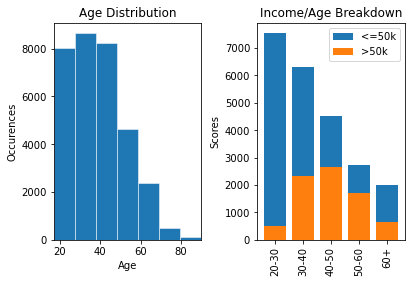

<Figure size 432x288 with 0 Axes>

In [13]:
# plot:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Age Distrubtion
ax1.hist(data.age, bins=7, linewidth=0.5, edgecolor="white")
ax1.set(xlim=(data.age.min(), data.age.max()))
ax1.set_xlabel('Age')
ax1.set_ylabel('Occurences')
ax1.set_title('Age Distribution')

# Age & Income
greater50age = data.age[data.salary == ' >50K']
less50age = data.age[data.salary == ' <=50K']

ax2.bar(ageLabels, less50AgeCounts, label='<=50k')
ax2.bar(ageLabels, greater50AgeCounts, label='>50k')

ax2.set_ylabel('Scores')
ax2.set_title('Income/Age Breakdown')
ax2.legend()

plt.show()
plt.clf()

- The histogram of age distribution affirms what the examination of the quantiles suggested: that the vast majority of participants are under the age of 50
- The stacked bar chart shows that income seems to increase with age until the age of 60 (rough retirement age)

In [14]:
# corr and r squared
corr = pearsonr(data.age, data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by age.".format(corr[0]*100))

(0.23403710264885985, 0.0)
23.40% of the variation in data can be explained by age.


- R^2 shows that a relatively large amount of variation in the data can be explained by age

### Education Level

- The first thing I did when examining education level was look at the percent of participants making over $50k. Those with an education level of less than 9th grade saw a similarly low income level, with jumps for each year of high school and a larger jump for each year of college until junior year.

In [16]:
# average income for each level
over50Num = []
under50Num = []
for x in np.sort(data['education-num'].unique()):
    sampleData = data.loc[data['education-num'] == x, 'salary_enc']
    try:
        number = sampleData.value_counts()[1]
        over50Num.append(number)
        under50 = sampleData.value_counts()[0]
        under50Num.append(under50)
        percent50k = round(((number)/(len(sampleData))*100), 2)
    except:
        percent50k = 0
        over50Num.append(0)
        under50Num.append(len(sampleData))
    average = sampleData.mean()
    if average > .5:
        average = ">$50k"
    else:
        average = "<=50k"
    print('The average salary for grade {grade} is {avg}, with {percent}% of participants making over $50k'.format(grade=x, avg=average, percent=percent50k) )

The average salary for grade 1 is <=50k, with 0% of participants making over $50k
The average salary for grade 2 is <=50k, with 3.57% of participants making over $50k
The average salary for grade 3 is <=50k, with 4.8% of participants making over $50k
The average salary for grade 4 is <=50k, with 6.19% of participants making over $50k
The average salary for grade 5 is <=50k, with 5.25% of participants making over $50k
The average salary for grade 6 is <=50k, with 6.65% of participants making over $50k
The average salary for grade 7 is <=50k, with 5.11% of participants making over $50k
The average salary for grade 8 is <=50k, with 7.62% of participants making over $50k
The average salary for grade 9 is <=50k, with 15.95% of participants making over $50k
The average salary for grade 10 is <=50k, with 19.02% of participants making over $50k
The average salary for grade 11 is <=50k, with 26.12% of participants making over $50k
The average salary for grade 12 is <=50k, with 24.84% of partici

In [17]:
# number of each type of income at each grade level for bar chart
print(over50Num)
print(under50Num)

[0, 6, 16, 40, 27, 62, 60, 33, 1675, 1387, 361, 265, 2221, 959, 423, 306]
[51, 162, 317, 606, 487, 871, 1115, 400, 8826, 5904, 1021, 802, 3134, 764, 153, 107]


In [18]:
data['edu_binned'] = pd.cut(x=data['education-num'], bins=[0,8,10,12,14,16])
data['edu_binned'].unique()

[(12, 14], (8, 10], (0, 8], (10, 12], (14, 16]]
Categories (5, interval[int64, right]): [(0, 8] < (8, 10] < (10, 12] < (12, 14] < (14, 16]]

In [19]:
over50k = {}
for x in data['edu_binned'].unique():
    over50k[x] = 0
over50k

{Interval(12, 14, closed='right'): 0,
 Interval(8, 10, closed='right'): 0,
 Interval(0, 8, closed='right'): 0,
 Interval(10, 12, closed='right'): 0,
 Interval(14, 16, closed='right'): 0}

In [20]:
greater50age = data['education-num'][data.salary == ' >50K']
less50age = data['education-num'][data.salary == ' <=50K']

less50education = pd.cut(x=less50age, bins=[])

In [21]:
edu_labels = np.sort(data['education-num'].unique())

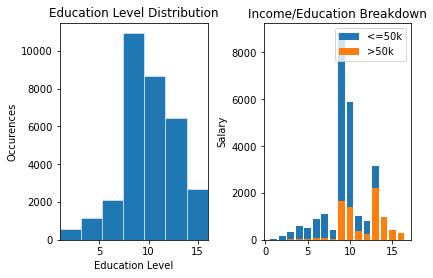

<Figure size 432x288 with 0 Axes>

In [22]:
# plot:
fig, (ax1, ax2) = plt.subplots(1,2)
plt.tight_layout(pad=2.5)

# Education Distrubtion
ax1.hist(data['education-num'], bins=7, linewidth=0.5, edgecolor="white")
ax1.set(xlim=(data['education-num'].min(), data['education-num'].max()))
ax1.set_xlabel('Education Level')
ax1.set_ylabel('Occurences')
ax1.set_title('Education Level Distribution')

# Education & Income
ax2.bar(edu_labels, under50Num, label='<=50k')
ax2.bar(edu_labels, over50Num, label='>50k')

ax2.set_ylabel('Salary')
ax2.set_title('Income/Education Breakdown')
ax2.legend()

plt.show()
plt.clf()

- The bar chart shows that the vast majority made it to or finished high school, with a smaller percentage making it to year 15/16.
- The stacked bar chart showed that income level seemed to increase almost directly proportionally to grade, with those who finished year one of college virtually all making over $50k.

In [23]:
# corr and r squared
corr = pearsonr(data['education-num'], data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by education level.".format(corr[0]*100))

(0.3351539526909414, 0.0)
33.52% of the variation in data can be explained by education level.


- R^2 shows that a larger amount of variation in the data can be explained by education than by age (33.5% vs. 23.4%)

### Occupation

In [24]:
# count of each type of occupation over 50k
greater50occupation = data['occupation'][data.salary == ' >50K']
greater50count = []
for occupation in data.occupation.unique():
    count = data['occupation'][(data.salary == ' >50K') & (data.occupation == occupation)].count()
    greater50count.append(count)
    
# count of each type of occupation under 50k
less50occupation = data['occupation'][data.salary == ' <=50K']
less50count = []
for occupation in data.occupation.unique():
    count = data['occupation'][(data.salary == ' <=50K') & (data.occupation == occupation)].count()
    less50count.append(count)
    
print(greater50count)
print(less50count)

[507, 1968, 86, 1859, 137, 983, 929, 320, 115, 250, 283, 191, 211, 1, 1]
[3263, 2098, 1284, 2281, 3158, 2667, 3170, 1277, 879, 1752, 645, 1652, 438, 8, 148]


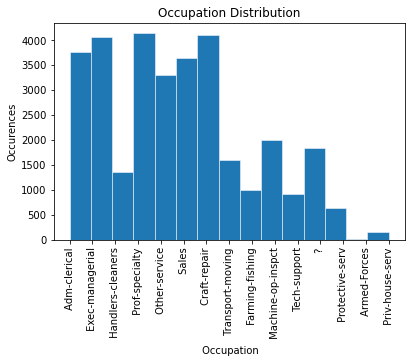

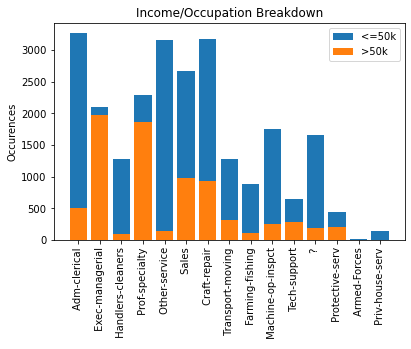

<Figure size 432x288 with 0 Axes>

In [25]:
# plot:
fig, ax1 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Education Distrubtion
ax1.hist(data['occupation'], bins=(len(data.occupation.unique())), linewidth=0.5, edgecolor="white")

ax1.set_xlabel(' Occupation')
ax1.set_ylabel('Occurences')
ax1.set_title('Occupation Distribution')


# plot 2
fig, ax2 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Education & Income
ax2.bar(data['occupation'].unique(), less50count, label='<=50k')
ax2.bar(data['occupation'].unique(), greater50count, label='>50k')

ax2.set_ylabel('Occurences')
ax2.set_title('Income/Occupation Breakdown')
ax2.legend()

plt.show()
plt.clf()

- The histogram of professions show a relatively even distribution among top professions, and a group with less instances.
- The stacked bar chart showed exec-managerial and prof-specialty (as expected) to be the best performing occupation, with professions such as sales and craft-repair following. After those, there appears to be a significant drop off in the percentage of people making over 50k.

- Next, I created a new column with encoded professions based on each profession's percentage overr $50k. This creates a new, usable feature for classification.

In [26]:
# rank income averages by occupation
percentOver50k = {}
for x in data['occupation'].unique():
    occupationSalary = data.loc[data['occupation'] == x, 'salary_enc']
    number = occupationSalary.value_counts()[1]
    divisor = occupationSalary.value_counts()[0]
    percent50k = (np.round(((number)/(divisor)),2))
    percentOver50k[x] = percent50k
    #except:
     #   pecentOver50k.append(0)
print('Percent of each profession over $50k:')    
print(percentOver50k)
# sort dict
percentOver50k = {k: v for k, v in sorted(percentOver50k.items(), key=lambda item: item[1])}
# set up list in ascending income order
occupationRanking = [key for key in percentOver50k.keys()]
# dictionary with codes
codes = {}
for x in range(len(occupationRanking)):
    codes[occupationRanking[x]] = x
print('Profession codes:')
print(codes)
# replace values with codes
data['occupation_enc'] = data['occupation'].replace(codes)
data['occupation_enc']

Percent of each profession over $50k:
{' Adm-clerical': 0.16, ' Exec-managerial': 0.94, ' Handlers-cleaners': 0.07, ' Prof-specialty': 0.81, ' Other-service': 0.04, ' Sales': 0.37, ' Craft-repair': 0.29, ' Transport-moving': 0.25, ' Farming-fishing': 0.13, ' Machine-op-inspct': 0.14, ' Tech-support': 0.44, ' ?': 0.12, ' Protective-serv': 0.48, ' Armed-Forces': 0.12, ' Priv-house-serv': 0.01}
Profession codes:
{' Priv-house-serv': 0, ' Other-service': 1, ' Handlers-cleaners': 2, ' ?': 3, ' Armed-Forces': 4, ' Farming-fishing': 5, ' Machine-op-inspct': 6, ' Adm-clerical': 7, ' Transport-moving': 8, ' Craft-repair': 9, ' Sales': 10, ' Tech-support': 11, ' Protective-serv': 12, ' Prof-specialty': 13, ' Exec-managerial': 14}


0         7
1        14
2         2
3         2
4        13
         ..
32556    11
32557     6
32558     7
32559     7
32560    14
Name: occupation_enc, Length: 32561, dtype: int64

In [27]:
# corr and r squared
corr = pearsonr(data['occupation_enc'], data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by occupation.".format(corr[0]*100))

(0.33654148323572514, 0.0)
33.65% of the variation in data can be explained by occupation.


- R^2 shows that a similarly large amount of variation in the data can be explained by occupation and education (33.65% vs. 33.5%)

### Race

- When examining race, I first created a new encoded column ranked based on (again) percent of particpants who made over $50k.

In [28]:
under50Count = []
over50Count = []
#
raceAvgSal = {}

# getting count of each race for bar chart and adding % over 50 to raceAvgSal dict
for x in data.race.unique():
    raceSalary = data.loc[data['race'] == x, 'salary_enc']
    raceAvgSal[x] = raceSalary.mean()
    over50 = raceSalary.value_counts()[1]
    over50Count.append(over50)
    under50 = raceSalary.value_counts()[0]
    under50Count.append(under50)
# sort dict
percentOver50k = {k: v for k, v in sorted(raceAvgSal.items(), key=lambda item: item[1])}


# set up list in ascending income order
raceIncomeRanking = [key for key in percentOver50k.keys()]
# dictionary with codes
codes = {}
for x in range(len(raceIncomeRanking)):
    codes[raceIncomeRanking[x]] = x
print('Codes for each race:')
print(codes)
# replace values with codes
data['race_enc'] = data['race'].replace(codes)
data['race_enc']

Codes for each race:
{' Other': 0, ' Amer-Indian-Eskimo': 1, ' Black': 2, ' White': 3, ' Asian-Pac-Islander': 4}


0        3
1        3
2        3
3        2
4        2
        ..
32556    3
32557    3
32558    3
32559    3
32560    3
Name: race_enc, Length: 32561, dtype: int64

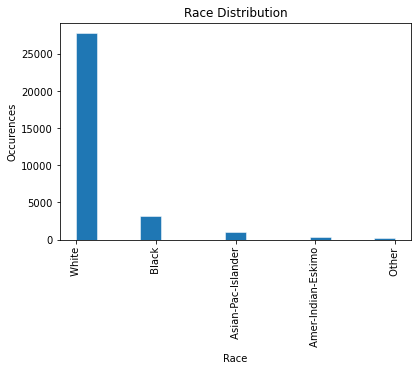

<Figure size 432x288 with 0 Axes>

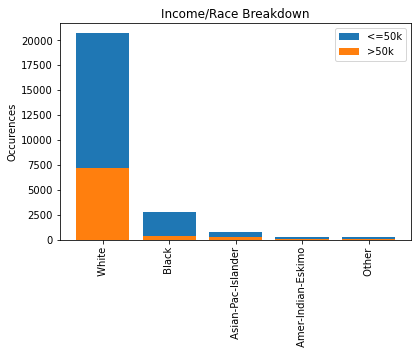

<Figure size 432x288 with 0 Axes>

In [29]:
# plot:
fig, ax1 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Racial Distrubtion
ax1.hist(data['race'], bins=(len(data.occupation.unique())), linewidth=0.5, edgecolor="white")

ax1.set_xlabel('Race')
ax1.set_ylabel('Occurences')
ax1.set_title('Race Distribution')
plt.show()
plt.clf()

# plot 2
fig, ax2 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Race & Income
ax2.bar(data['race'].unique(), under50Count, label='<=50k')
ax2.bar(data['race'].unique(), over50Count, label='>50k')

ax2.set_ylabel('Occurences')
ax2.set_title('Income/Race Breakdown')
ax2.legend()

plt.show()
plt.clf()

- The histogram shows that the vast majority of participants in the study were white.
- The stacked bar chart also shows that white people had a significantly higher percentage of particpants making over 50k than all the other groups except for Asian-Pacific Islanders.

In [30]:
# corr and r squared
corr = pearsonr(data['race_enc'], data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by race.".format(corr[0]*100))

(0.08845132351323315, 1.4650028776225672e-57)
8.85% of the variation in data can be explained by race.


- R^2 shows that a small amount of variation in the data can be explained by race (possibly because of the fact that there are far more white people surveyed than other races)

### Sex

- Next, I examined the sex column. I started by preparing data for the charts and then creating a new encoded column that would represent 1 for male and 0 for female.

In [31]:
under50Count = []
over50Count = []
#
sexAvgSal = {}

# getting count of each gender for bar chart and adding % over 50 to sexAvgSal dict
for x in data.sex.unique():
    sexSalary = data.loc[data['sex'] == x, 'salary_enc']
    sexAvgSal[x] = sexSalary.mean()
    over50 = sexSalary.value_counts()[1]
    over50Count.append(over50)
    under50 = sexSalary.value_counts()[0]
    under50Count.append(under50)
# sort dict
percentOver50k = {k: v for k, v in sorted(sexAvgSal.items(), key=lambda item: item[1])}


# set up list in ascending income order
sexIncomeRanking = [key for key in percentOver50k.keys()]
# dictionary with codes
codes = {' Male': 1, ' Female': 0}
data['sex_enc'] = data['sex'].replace(codes)
data['sex_enc']

0        1
1        1
2        1
3        1
4        0
        ..
32556    0
32557    1
32558    0
32559    1
32560    0
Name: sex_enc, Length: 32561, dtype: int64

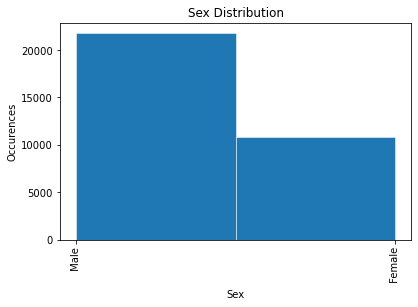

<Figure size 432x288 with 0 Axes>

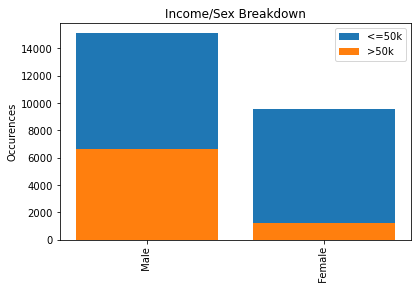

<Figure size 432x288 with 0 Axes>

In [32]:
# plot:
fig, ax1 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Sex Distrubtion
ax1.hist(data['sex'], bins=(len(data.sex.unique())), linewidth=0.5, edgecolor="white")

ax1.set_xlabel('Sex')
ax1.set_ylabel('Occurences')
ax1.set_title('Sex Distribution')
plt.show()
plt.clf()

# plot 2
fig, ax2 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')

# Sex & Income
ax2.bar(data['sex'].unique(), under50Count, label='<=50k')
ax2.bar(data['sex'].unique(), over50Count, label='>50k')

ax2.set_ylabel('Occurences')
ax2.set_title('Income/Sex Breakdown')
ax2.legend()

plt.show()
plt.clf()

- This histogram shows that there were around twice as many male participants than female.
- In addition, the stacked bar chart shows that a far larger percentage of males made 50k than their female counterparts.
- Upon further examination in the next cell, around 3x as many males made $50k.

In [33]:
sexPercent50 = []

for x in sexAvgSal.values():
    sexPercent50.append(x)
print('{0:.2f}% of male respondents made over $50k'.format(sexPercent50[0]*100))
print('{0:.2f}% of female respondents made over $50k'.format(sexPercent50[1]*100))

30.57% of male respondents made over $50k
10.95% of female respondents made over $50k


In [34]:
# corr and r squared
corr = pearsonr(data['sex_enc'], data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by sex.".format(corr[0]*100))

(0.21598015058403522, 0.0)
21.60% of the variation in data can be explained by sex.


- R^2 shows that a large amount of variation in the data can be explained by sex, but a lower amount than occupation and education (perhaps due to a lack of access to resources and opportunities these other columns explore)

### Hours Per Week

In [36]:
under50Count = []
over50Count = []
#
hoursAvgSal = {}

# getting count of each gender for bar chart and adding % over 50 to sexAvgSal dict
for x in data['hours-per-week'].unique():
    hoursSalary = data.loc[data['hours-per-week'] == x, 'salary_enc']
    hoursAvgSal[x] = hoursSalary.mean()
    try:
        over50 = hoursSalary.value_counts()[1]
        over50Count.append(over50)
    except:
        over50 = 0
        over50Count.append(over50)
    try:
        under50 = hoursSalary.value_counts()[0]
        under50Count.append(under50)
    except:
        under50 = 0
        under50Count.append(under50)

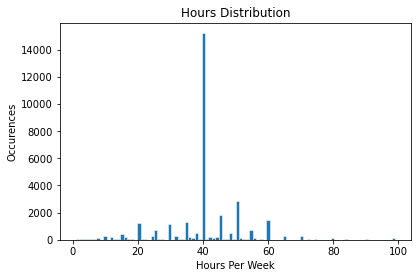

<Figure size 432x288 with 0 Axes>

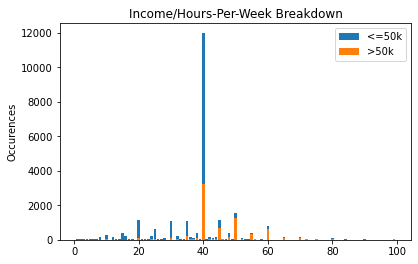

<Figure size 432x288 with 0 Axes>

In [37]:
# plot:
fig, ax1 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)


# Hours Distrubtion
ax1.hist(data['hours-per-week'], bins=(len(data['hours-per-week'].unique())), linewidth=0.5, edgecolor="white")

ax1.set_xlabel('Hours Per Week')
ax1.set_ylabel('Occurences')
ax1.set_title('Hours Distribution')
plt.show()
plt.clf()

# plot 2
fig, ax2 = plt.subplots(1,1)
plt.tight_layout(pad=2.5)


# Education & Income
ax2.bar(data['hours-per-week'].unique(), under50Count, label='<=50k')
ax2.bar(data['hours-per-week'].unique(), over50Count, label='>50k')

ax2.set_ylabel('Occurences')
ax2.set_title('Income/Hours-Per-Week Breakdown')
ax2.legend()

plt.show()
plt.clf()

- The histogram breakdow of hours per week shows that a large percentage of participants worked 40 hours a week or more.
- The stacked bar chart shows that it was unlikely someone made over $50k if they worked less than 40 hours.
- That likelhood seems to be increasing with hours as those who worked 60 almost all made 50k.

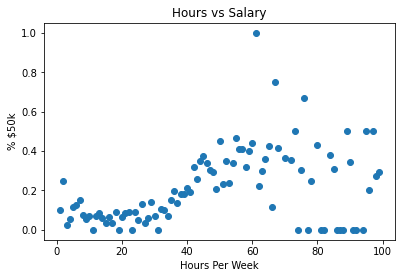

<Figure size 432x288 with 0 Axes>

In [38]:
hours = [key for key in hoursAvgSal.keys()]
salary = [value for value in hoursAvgSal.values()]
# plot:
fig, ax = plt.subplots(1,1)
plt.tight_layout(pad=2.5)

# Hours-Per-Week Scatter
ax.scatter(hours, salary)

ax.set_xlabel('Hours Per Week')
ax.set_ylabel('% $50k')
ax.set_title('Hours vs Salary')
plt.show()
plt.clf()

- A scatter plot seems to confirm the positive correlation (save for a few high hour groups that averaged 0 likely because of small sample size)

In [39]:
corr = pearsonr(data['hours-per-week'], data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by hours worked.".format(corr[0]*100))

(0.2296890656708137, 0.0)
22.97% of the variation in data can be explained by hours worked.


- R^2 shows that hours worked is a relatively important column, but not as crucial as education or occupation

### Native-Country

- The fist thing I did when examining Native-Country was to prepare data for charts and then create a new encoded column based on a income rankings (as I did with occupation and race)

In [40]:
under50Count = []
over50Count = []
#
countryAvgSal = {}

# getting count of each race for bar chart and adding % over 50 to raceAvgSal dict
for x in data['native-country'].unique():
    countrySalary = data.loc[data['native-country'] == x, 'salary_enc']
    countryAvgSal[x] = countrySalary.mean()
    try:
        over50 = countrySalary.value_counts()[1]
        over50Count.append(over50)
    except:
        over50 = 0
        over50Count.append(over50)
    try:
        under50 = countrySalary.value_counts()[0]
        under50Count.append(under50)
    except:
        under50 = 0
        under50Count.append(under50)
# sort dict
percentOver50k = {k: v for k, v in sorted(countryAvgSal.items(), key=lambda item: item[1])}


# set up list in ascending income order
countryIncomeRanking = [key for key in percentOver50k.keys()]
# dictionary with codes
codes = {}
for x in range(len(countryIncomeRanking)):
    codes[countryIncomeRanking[x]] = x
print(countryAvgSal)
print('Codes for each race:')
print(codes)
# replace values with codes
data['country_enc'] = data['native-country'].replace(codes)
data['country_enc']

{' United-States': 0.24583476174151525, ' Cuba': 0.2631578947368421, ' Jamaica': 0.12345679012345678, ' India': 0.4, ' ?': 0.2504288164665523, ' Mexico': 0.05132192846034215, ' South': 0.2, ' Puerto-Rico': 0.10526315789473684, ' Honduras': 0.07692307692307693, ' England': 0.3333333333333333, ' Canada': 0.32231404958677684, ' Germany': 0.32116788321167883, ' Iran': 0.4186046511627907, ' Philippines': 0.30808080808080807, ' Italy': 0.3424657534246575, ' Poland': 0.2, ' Columbia': 0.03389830508474576, ' Cambodia': 0.3684210526315789, ' Thailand': 0.16666666666666666, ' Ecuador': 0.14285714285714285, ' Laos': 0.1111111111111111, ' Taiwan': 0.39215686274509803, ' Haiti': 0.09090909090909091, ' Portugal': 0.10810810810810811, ' Dominican-Republic': 0.02857142857142857, ' El-Salvador': 0.08490566037735849, ' France': 0.41379310344827586, ' Guatemala': 0.046875, ' China': 0.26666666666666666, ' Japan': 0.3870967741935484, ' Yugoslavia': 0.375, ' Peru': 0.06451612903225806, ' Outlying-US(Guam-U

0        23
1        23
2        23
3        23
4        26
         ..
32556    23
32557    23
32558    23
32559    23
32560    23
Name: country_enc, Length: 32561, dtype: int64

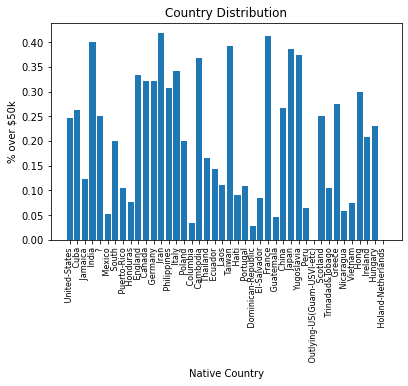

<Figure size 432x288 with 0 Axes>

In [530]:
hours = [key for key in countryAvgSal.keys()]
salary = [value for value in countryAvgSal.values()]
# plot:
fig, ax = plt.subplots(1,1)
plt.tight_layout(pad=2.5)
plt.xticks(rotation='vertical')
plt.tick_params(axis='x', which='major', labelsize=8)

# Hours Distrubtion
ax.bar(hours, salary)

ax.set_xlabel('Native Country')
ax.set_ylabel('% over $50k')
ax.set_title('Country Distribution')
plt.show()
plt.clf()



- I chose a different approach with bar chart for this section for the sake of readability. I used a bar chart with the percent of each country over 50k.
- Top countries included Iran, France, Taiwan, and the Phillipines (the United States lagged behind unexpectedly)

In [180]:
corr = pearsonr(data['country_enc'], data.salary_enc)
print(corr)
print("{0:.2f}% of the variation in data can be explained by country of origin.".format(corr[0]*100))

(0.09789280844161949, 3.749754304851948e-70)
9.79% of the variation in data can be explained by country of origin.


- This feature appears to be rather uninfluential, with less than 10% of the variation explained by native country.

## Final Data Examination

In [43]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,race,sex,hours-per-week,native-country,salary,salary_enc,edu_binned,occupation_enc,race_enc,sex_enc,country_enc
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,Male,40,United-States,<=50K,0,"(12, 14]",7,3,1,23
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,Male,13,United-States,<=50K,0,"(12, 14]",14,3,1,23
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,White,Male,40,United-States,<=50K,0,"(8, 10]",2,3,1,23
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Black,Male,40,United-States,<=50K,0,"(0, 8]",2,2,1,23
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,Female,40,Cuba,<=50K,0,"(12, 14]",13,2,0,26


In [ ]:
# 
'occupation_enc': 33.65, 
'education-num': 33.52, 
'age': 23.40,
'hours-per-week': 22.97
'sex_enc': 21.60, 

## Predictions

### Support Vector

- When implementing the Support Vector Machine classifier, I used variety of combinations of features and kernels. 
- I found the poly kernel performed the best of the three main options (linear and rbf being the other two).
- I also found that the combination of occupation, education, age, and sex, and hours-per-week (the features with the highest correlation/R squared values when compared with salary) along with the native-country column produced the best results with 81.5% accuracy.

In [215]:
# data selection
features = data[['occupation_enc', 'education-num', 'age', 'hours-per-week', 'sex_enc', 'country_enc']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [216]:
kernels = ['linear', 'poly', 'rbf']

In [217]:
classifier = SVC(kernel='poly')

In [218]:
classifier.fit(X_train, y_train)

SVC(kernel='poly')

In [219]:
score = classifier.score(X_test, y_test)
print(score)

0.8168278826961461


### K-Nearest Neighbors

- For K-Nearest Neighbors, I found the best results when I dropped the native-country column.
- I used 2 as the argument for neighbors because:
    - Performance decresed when I added or subtracted from that number
    - The target variable is a binary variable
- I achieved an accuracy of 78% with this algorithm.

In [244]:
# data selection
features = data[['occupation_enc', 'education-num', 'age', 'hours-per-week', 'sex_enc']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [245]:
knnClassifier = KNeighborsClassifier(n_neighbors = 2)

In [246]:
knnClassifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [247]:
score = knnClassifier.score(X_test, y_test)
print(score)

0.7799785045294028


### Naive Bayes

- With Naive-Bayes, I found the best results when I dropped both the native-country and the hours per week columns.
- This led to an accuracy of 80.37% (this was the best result out of 5)

In [329]:
# data selection
features = data[['occupation_enc', 'education-num', 'age', 'sex_enc']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [330]:
nbClassifier = GaussianNB()

In [331]:
nbClassifier.fit(X_train, y_train)

GaussianNB()

In [332]:
score = nbClassifier.score(X_test, y_test)
print(score)

0.8037770612620913


### Logistic Regression

- For the Logistic Regression implementation, I found that dropping the native country but keeping the rest led to the best, most consistent results
- This algorithm achieved a 81% accuracy rate

In [295]:
# data selection
features = data[['occupation_enc', 'education-num', 'age', 'sex_enc', 'hours-per-week']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [296]:
lrClassifier = LogisticRegression()

In [297]:
lrClassifier.fit(X_train, y_train)

LogisticRegression()

In [298]:
score = lrClassifier.score(X_test, y_test)
print(score)

0.8106863196683556


### Decision Tree

- When implementing the decision tree, I found that, surprisingly, it performed better without the age column.
- I was able to get an accuracy just below 80 at 79.90%.

In [525]:
# data selection
features = data[['occupation_enc', 'education-num', 'hours-per-week', 'sex_enc']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [526]:
dtree = DecisionTreeClassifier()

In [527]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [528]:
score = dtree.score(X_test, y_test)
print(score)

0.7990173499155535


### Random Forest

- For random forest, I found occupation, education, age, hours-per-week, and sex to be the best combination of features.
- I also found the ideal number of estimators to be at least 10, after which the improvement ceased.
- Random Forest achieved an accuracy of 79.7%

In [504]:
# data selection
features = data[['occupation_enc', 'education-num', 'age', 'hours-per-week', 'sex_enc']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [505]:
rfClassifier = RandomForestClassifier(n_estimators = 10)

In [506]:
rfClassifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [507]:
score = rfClassifier.score(X_test, y_test)
print(score)

0.7974819591586059


## XGBoost

- I also implemented the XGBoost classifier, and used the occupation, education, age, hours, and sex columns.
- The model achieved around an accuracy score of 82.12%.

In [502]:
# data selection
features = data[['occupation_enc', 'education-num', 'hours-per-week', 'age', 'sex_enc']]
labels = data['salary_enc']
# data split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)

In [503]:
xg = XGBClassifier()
xg.fit(X_train, y_train)
score = xg.score(X_test, y_test)
print(score)

0.8212805158912944


# Conclusion

- Of the available features, occupation and education level seem to have the greatest impact on income level.
- Age, hours worked, and sex comprised the next tier of features.
- Race and native country were less useful features
    - Race seemed relatively skewed with respect to the proportions of the available data, which may have affected it's effectiveness as a training feature
    - The native country column's distribution also seemed relatively random and skewed (United States dominant). This distribution likely contributed to countries like Iran being atop the average income rankings, and limited the possible effectiveness of the feature given the high percentage of participants of U.S. origin.